# PRAKTIKUM 2
Klasifikasi Multi-label dengan Data CIFAT

## **Deskripsi**
Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.

## **Langkah 1 - Load Library**

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## **Langkah 2 - Unduh Dataset CIFAR**

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

## **Langkah 3 - Verifikasi Data**

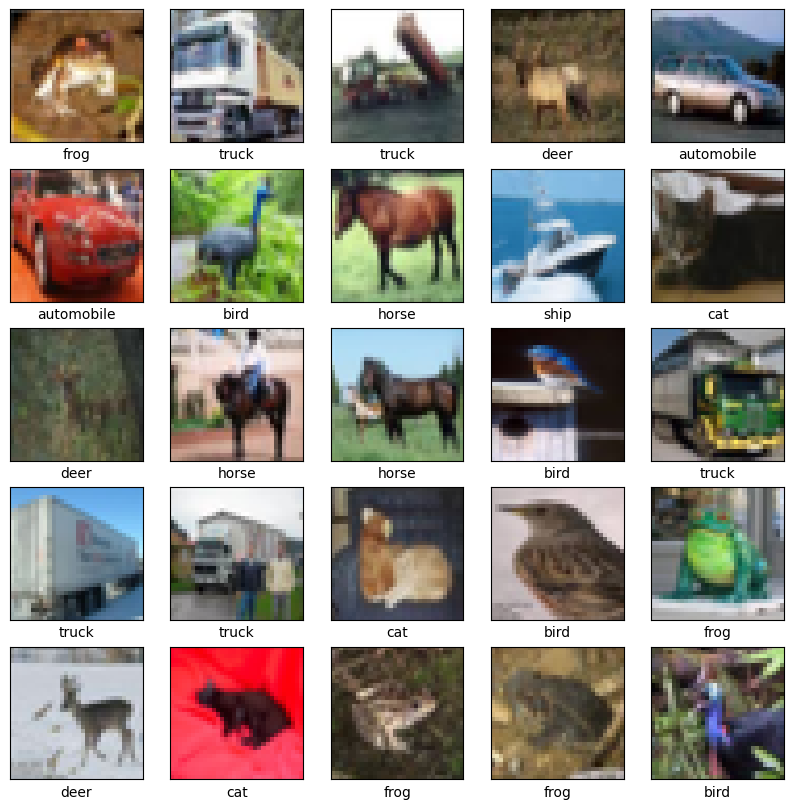

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## **Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

**Langkah 4.5. - Compile Model CNN**

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **Langkah 5 - Fit Model**

In [10]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.5931 - accuracy: 0.4108 - val_loss: 1.3095 - val_accuracy: 0.5288
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 1.2186 - accuracy: 0.5611 - val_loss: 1.1889 - val_accuracy: 0.5723
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0562 - accuracy: 0.6233 - val_loss: 1.0326 - val_accuracy: 0.6376
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9474 - accuracy: 0.6651 - val_loss: 0.9880 - val_accuracy: 0.6543
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8687 - accuracy: 0.6926 - val_loss: 0.9404 - val_accuracy: 0.6749
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7982 - accuracy: 0.7183 - val_loss: 0.9089 - val_accuracy: 0.6923
Epoch 7/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7496 - accuracy: 0.7357 - val_loss: 0.9049 -

## **Langkah 6 - Evaluasi Model**

313/313 - 2s - loss: 0.9261 - accuracy: 0.6904 - 2s/epoch - 8ms/step


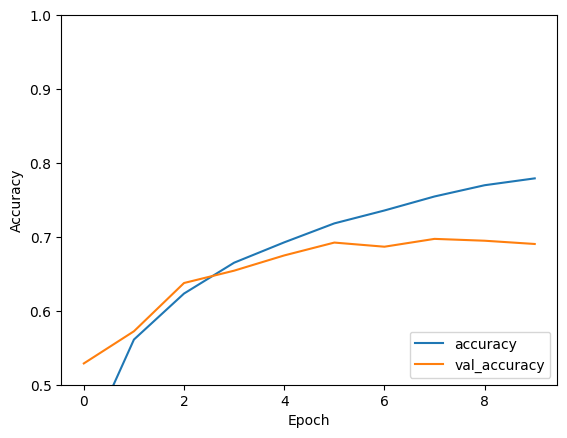

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

## **Langkah 7 - Cetak Hasil Akurasi**

In [12]:
print(test_acc)

0.6904000043869019


# TUGAS 1
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

**Percobaan Pertama**

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.7649 - accuracy: 0.3399 - val_loss: 1.3113 - val_accuracy: 0.5272
Epoch 2/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.3640 - accuracy: 0.5098 - val_loss: 1.2156 - val_accuracy: 0.5630
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.1954 - accuracy: 0.5784 - val_loss: 1.0180 - val_accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0817 - accuracy: 0.6207 - val_loss: 0.9471 - val_accuracy: 0.6704
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.9921 - accuracy: 0.6548 - val_loss: 0.9314 - val_accuracy: 0.6741
Epoch 6/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9202 - accuracy: 0.6808 - val_loss: 0.8576 - val_accuracy: 0.7071
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8593 - accuracy: 0.7027 - val_loss: 0.8165 -

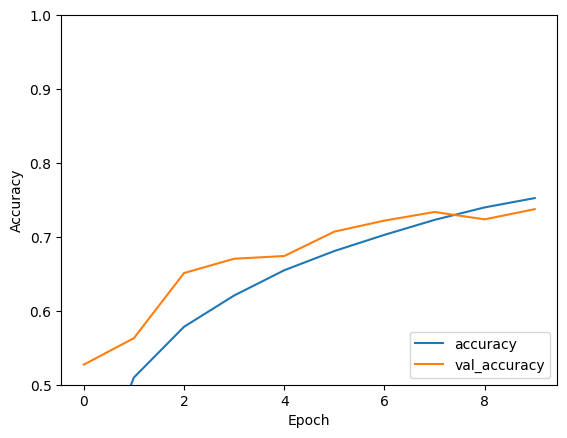

In [22]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))  # Layer tambahan
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # Add Dropout layer
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

**Percobaan Kedua**

Epoch 1/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.9628 - accuracy: 0.2601 - val_loss: 1.7051 - val_accuracy: 0.3761
Epoch 2/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.7036 - accuracy: 0.3820 - val_loss: 1.5300 - val_accuracy: 0.4500
Epoch 3/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.5891 - accuracy: 0.4279 - val_loss: 1.4074 - val_accuracy: 0.4949
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.5041 - accuracy: 0.4601 - val_loss: 1.3387 - val_accuracy: 0.5201
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4497 - accuracy: 0.4830 - val_loss: 1.3301 - val_accuracy: 0.5259
Epoch 6/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4025 - accuracy: 0.5017 - val_loss: 1.3304 - val_accuracy: 0.5244
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.3677 - accuracy: 0.5140 - val_loss: 1.2897 -

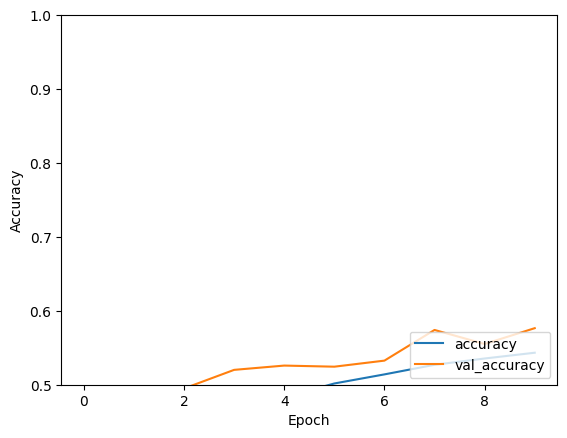

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Build the model
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))  # Menambahkan lebih banyak filter
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Layer Dense yang lebih banyak neuron
model.add(layers.Dropout(0.5))  # Dropout untuk mencegah overfitting
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit the model with more epochs
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

**Percobaan Ketiga**

In [26]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

# Load VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the base model
base_model.trainable = False

# Create new model on top
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Fit the model with data augmentation
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")


58889256/58889256 [==============================] - 44s 1us/step
Epoch 1/10
1563/1563 [==============================] - 179s 114ms/step - loss: 1.8448 - accuracy: 0.3464 - val_loss: 1.5280 - val_accuracy: 0.4827
Epoch 2/10
1563/1563 [==============================] - 200s 128ms/step - loss: 1.5179 - accuracy: 0.4718 - val_loss: 1.3962 - val_accuracy: 0.5204
Epoch 3/10
1563/1563 [==============================] - 218s 140ms/step - loss: 1.4213 - accuracy: 0.5043 - val_loss: 1.3344 - val_accuracy: 0.5396
Epoch 4/10
1563/1563 [==============================] - 221s 141ms/step - loss: 1.3614 - accuracy: 0.5270 - val_loss: 1.2978 - val_accuracy: 0.5486
Epoch 5/10
1563/1563 [==============================] - 218s 139ms/step - loss: 1.3208 - accuracy: 0.5402 - val_loss: 1.2687 - val_accuracy: 0.5600
Epoch 6/10
1563/1563 [==============================] - 213s 136ms/step - loss: 1.2903 - accuracy: 0.5529 - val_loss: 1.2512 - val_accuracy: 0.5644
Epoch 7/10
1563/1563 [========================

KeyboardInterrupt: 

**Percobaan Keempat**

Epoch 1/20
1563/1563 [==============================] - 83s 52ms/step - loss: 1.7029 - accuracy: 0.3748 - val_loss: 1.2992 - val_accuracy: 0.5338
Epoch 2/20
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4097 - accuracy: 0.4976 - val_loss: 1.1820 - val_accuracy: 0.5728
Epoch 3/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2856 - accuracy: 0.5479 - val_loss: 1.0654 - val_accuracy: 0.6222
Epoch 4/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2090 - accuracy: 0.5785 - val_loss: 1.0089 - val_accuracy: 0.6494
Epoch 5/20
1563/1563 [==============================] - 76s 49ms/step - loss: 1.1503 - accuracy: 0.6017 - val_loss: 1.1280 - val_accuracy: 0.6067
Epoch 6/20
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1067 - accuracy: 0.6142 - val_loss: 1.0540 - val_accuracy: 0.6424
Epoch 7/20
1563/1563 [==============================] - 80s 51ms/step - loss: 1.0628 - accuracy: 0.6312 - val_loss: 0.8995 -

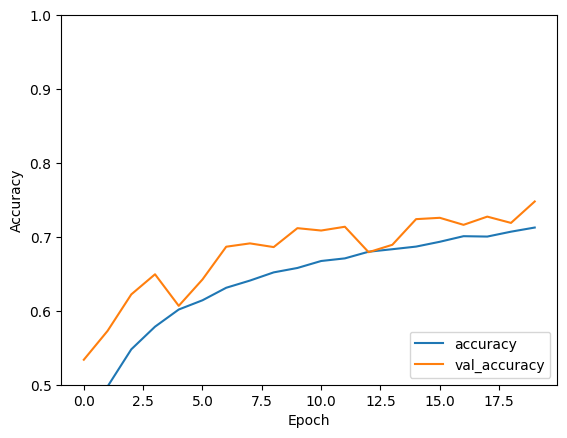

In [27]:
# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
])

# Build the model
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print testing accuracy
print(test_acc)

**Percobaan Kelima**

Epoch 1/50
1563/1563 [==============================] - 93s 58ms/step - loss: 1.7500 - accuracy: 0.3769 - val_loss: 1.4229 - val_accuracy: 0.4999
Epoch 2/50
1563/1563 [==============================] - 86s 55ms/step - loss: 1.4779 - accuracy: 0.4909 - val_loss: 1.2649 - val_accuracy: 0.5667
Epoch 3/50
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3868 - accuracy: 0.5341 - val_loss: 1.2111 - val_accuracy: 0.5967
Epoch 4/50
1563/1563 [==============================] - 83s 53ms/step - loss: 1.3159 - accuracy: 0.5685 - val_loss: 1.1184 - val_accuracy: 0.6331
Epoch 5/50
1563/1563 [==============================] - 90s 57ms/step - loss: 1.2654 - accuracy: 0.5877 - val_loss: 1.1205 - val_accuracy: 0.6417
Epoch 6/50
1563/1563 [==============================] - 112s 72ms/step - loss: 1.2310 - accuracy: 0.6019 - val_loss: 1.0587 - val_accuracy: 0.6557
Epoch 7/50
1563/1563 [==============================] - 138s 89ms/step - loss: 1.2016 - accuracy: 0.6117 - val_loss: 1.0357

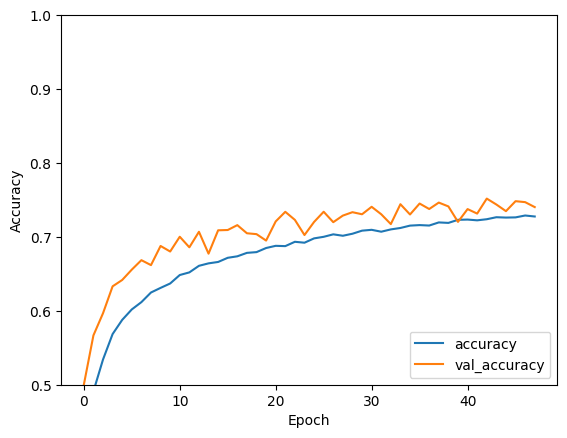

In [28]:
from tensorflow.keras import regularizers

# Build the model
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, epochs=50, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping])

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print testing accuracy
print(test_acc)

**Percobaan Keenam**

Epoch 1/30
1563/1563 [==============================] - 89s 56ms/step - loss: 1.8018 - accuracy: 0.3466 - val_loss: 1.4681 - val_accuracy: 0.4768
Epoch 2/30
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4637 - accuracy: 0.4815 - val_loss: 1.2617 - val_accuracy: 0.5579
Epoch 3/30
1563/1563 [==============================] - 90s 58ms/step - loss: 1.3388 - accuracy: 0.5355 - val_loss: 1.1619 - val_accuracy: 0.5978
Epoch 4/30
1563/1563 [==============================] - 91s 58ms/step - loss: 1.2570 - accuracy: 0.5667 - val_loss: 1.0735 - val_accuracy: 0.6344
Epoch 5/30
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1927 - accuracy: 0.5969 - val_loss: 1.1024 - val_accuracy: 0.6267
Epoch 6/30
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1513 - accuracy: 0.6121 - val_loss: 1.0847 - val_accuracy: 0.6386
Epoch 7/30
1563/1563 [==============================] - 87s 56ms/step - loss: 1.1196 - accuracy: 0.6237 - val_loss: 1.0477 -

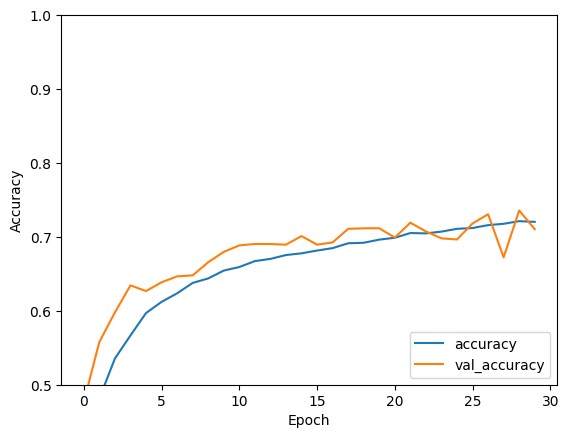

In [29]:
from tensorflow.keras import layers, regularizers

# Enhanced Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

# Enhanced Model Architecture
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))  # Added another Conv Layer
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))  # Dropout Layer
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels), 
                    callbacks=[early_stopping])

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print testing accuracy
print(test_acc)

**Percobaan Ketujuh**

Epoch 1/20
1563/1563 [==============================] - 94s 59ms/step - loss: 1.7047 - accuracy: 0.3610 - val_loss: 1.3003 - val_accuracy: 0.5227
Epoch 2/20
1563/1563 [==============================] - 208s 133ms/step - loss: 1.2961 - accuracy: 0.5402 - val_loss: 1.0992 - val_accuracy: 0.6117
Epoch 3/20
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1212 - accuracy: 0.6117 - val_loss: 0.9941 - val_accuracy: 0.6476
Epoch 4/20
1563/1563 [==============================] - 71s 45ms/step - loss: 1.0117 - accuracy: 0.6509 - val_loss: 0.9812 - val_accuracy: 0.6599
Epoch 5/20
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9365 - accuracy: 0.6808 - val_loss: 0.9538 - val_accuracy: 0.6752
Epoch 6/20
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8688 - accuracy: 0.7038 - val_loss: 0.9112 - val_accuracy: 0.6892
Epoch 7/20
1563/1563 [==============================] - 106s 68ms/step - loss: 0.8287 - accuracy: 0.7163 - val_loss: 0.893

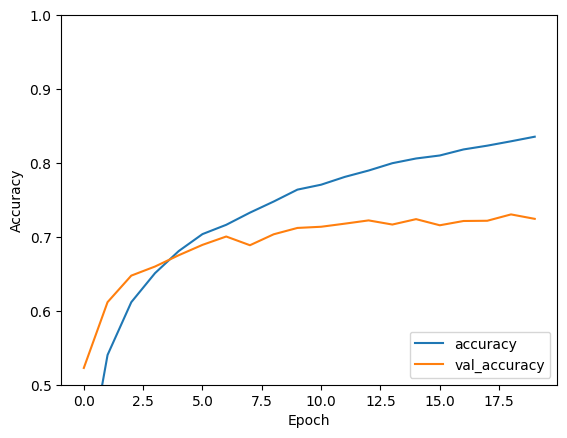

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print testing accuracy
print(test_acc)

**Percobaan Kedelapan**

Epoch 1/30
1563/1563 [==============================] - 84s 53ms/step - loss: 1.6878 - accuracy: 0.3703 - val_loss: 1.2855 - val_accuracy: 0.5377
Epoch 2/30
1563/1563 [==============================] - 166s 106ms/step - loss: 1.2862 - accuracy: 0.5454 - val_loss: 1.1217 - val_accuracy: 0.5990
Epoch 3/30
1563/1563 [==============================] - 110s 71ms/step - loss: 1.1234 - accuracy: 0.6094 - val_loss: 1.0338 - val_accuracy: 0.6394
Epoch 4/30
1563/1563 [==============================] - 100s 64ms/step - loss: 1.0176 - accuracy: 0.6509 - val_loss: 0.9374 - val_accuracy: 0.6724
Epoch 5/30
1563/1563 [==============================] - 108s 69ms/step - loss: 0.9348 - accuracy: 0.6809 - val_loss: 0.9150 - val_accuracy: 0.6771
Epoch 6/30
1563/1563 [==============================] - 96s 61ms/step - loss: 0.8790 - accuracy: 0.6993 - val_loss: 0.9116 - val_accuracy: 0.6874
Epoch 7/30
1563/1563 [==============================] - 87s 55ms/step - loss: 0.8258 - accuracy: 0.7195 - val_loss: 0.8

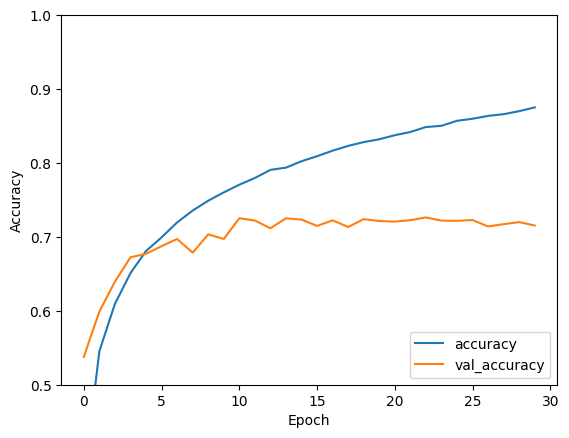

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=30, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print testing accuracy
print(test_acc)